In [136]:
import os, json, re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor

In [137]:
dir = "assignments/05/original"
experiments = os.listdir(dir)

In [138]:
results = []
for exp in experiments:
    beam_size = int(exp[-2:])
    with open(os.path.join(dir, exp, 'bleu.txt')) as f:
        score_dict = json.load(f)
        blue = score_dict['score']
        score = score_dict['verbose_score']
        match = re.search(r'BP\s*=\s*(\d+\.\d+)', score)
        if match:
            bp = match.group(1)
        else:
            print(f"BP not found in beam={beam_size}")

        results.append({
            'beam_size': beam_size,
            'blue': float(blue),
            'bp': float(bp)
        })
df = pd.DataFrame(results)

In [139]:
df.sort_values('beam_size', inplace=True)
df = df.reset_index(drop=True)
df

,beam_size,blue,bp
0,1,17.1,1.000
1,2,19.0,1.000
2,3,19.1,1.000
3,4,18.6,1.000
4,5,20.0,1.000
5,6,19.7,1.000
6,7,20.9,1.000
7,8,20.8,1.000
8,9,22.0,1.000
9,10,22.2,1.000


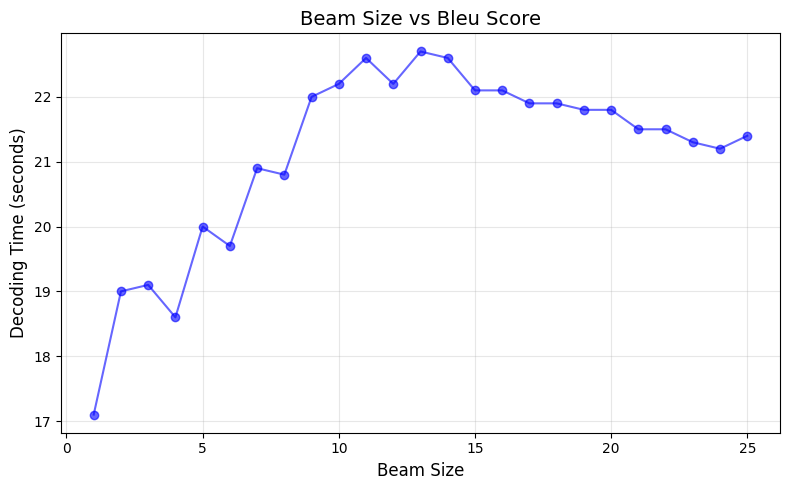

In [145]:
plt.figure(figsize=(8, 5))
plt.plot(df['beam_size'], df['blue'], marker='o', linestyle='-', color='b', label='Decoding Time', alpha=0.6)

plt.xlabel('Beam Size', fontsize=12)
plt.ylabel('Decoding Time (seconds)', fontsize=12)
plt.title('Beam Size vs Bleu Score', fontsize=14)
plt.grid(alpha=0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 800x400 with 0 Axes>

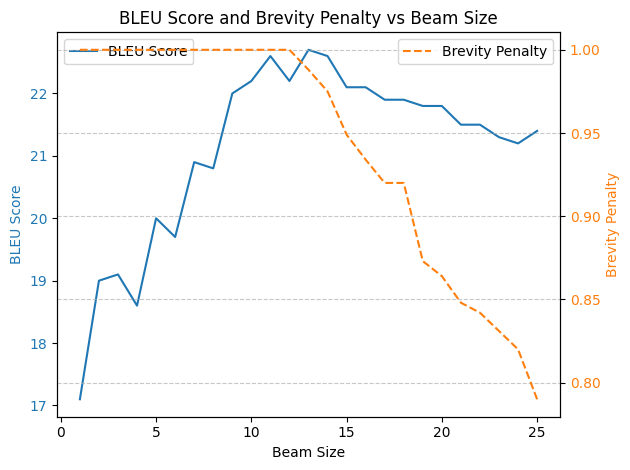

In [140]:
plt.figure(figsize=(8, 4))
ig, ax1 = plt.subplots()

# Plot BLEU score on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Beam Size')
ax1.set_ylabel('BLEU Score', color=color)
ax1.plot(df['beam_size'], df['blue'], color=color, label='BLEU Score')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Create a second y-axis for the brevity penalty
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Brevity Penalty', color=color)
ax2.plot(df['beam_size'], df['bp'], color=color, linestyle='--', label='Brevity Penalty')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

# Add title and improve layout
plt.title('BLEU Score and Brevity Penalty vs Beam Size')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [141]:
df_time = pd.read_csv('assignments/05/beam_decoding_times.txt')

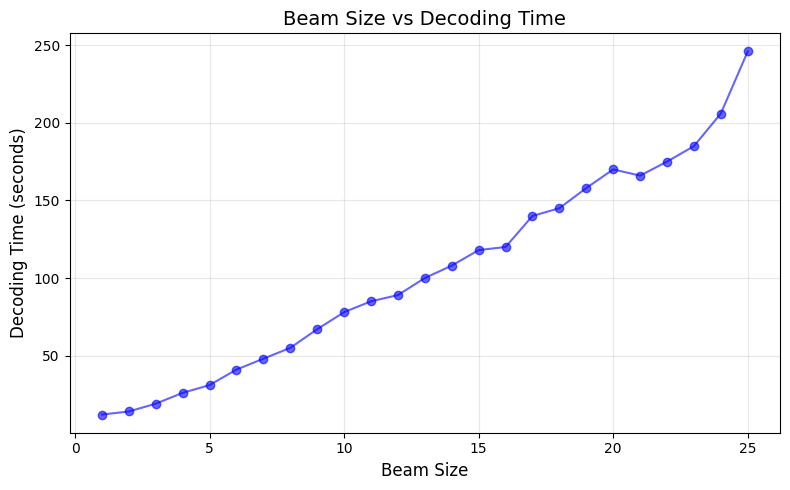

In [142]:
plt.figure(figsize=(8, 5))
plt.plot(df_time['Beam Size'], df_time['Real Time'], marker='o', linestyle='-', color='b', label='Decoding Time', alpha=0.6)

plt.xlabel('Beam Size', fontsize=12)
plt.ylabel('Decoding Time (seconds)', fontsize=12)
plt.title('Beam Size vs Decoding Time', fontsize=14)
plt.grid(alpha=0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [144]:
print(df)

    beam_size  blue     bp
0           1  17.1  1.000
1           2  19.0  1.000
2           3  19.1  1.000
3           4  18.6  1.000
4           5  20.0  1.000
5           6  19.7  1.000
6           7  20.9  1.000
7           8  20.8  1.000
8           9  22.0  1.000
9          10  22.2  1.000
10         11  22.6  1.000
11         12  22.2  1.000
12         13  22.7  0.988
13         14  22.6  0.975
14         15  22.1  0.949
15         16  22.1  0.934
16         17  21.9  0.920
17         18  21.9  0.920
18         19  21.8  0.873
19         20  21.8  0.864
20         21  21.5  0.848
21         22  21.5  0.842
22         23  21.3  0.831
23         24  21.2  0.820
24         25  21.4  0.790
